In [240]:
# Pkg.add("Distributed")
# Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# Pkg.add("NLopt")
# Pkg.add("LinearAlgebra")
# Pkg.add("Metrics")
# Pkg.add("CSV")
# Pkg.add("DataFrames")
# Pkg.add("StaticArrays")
# Pkg.add("ForwardDiff")
# Pkg.add("NamedTupleTools")
# Pkg.add("BenchmarkTools")
# Pkg.add("ComponentArrays")
# Pkg.add("Distributions")
# Pkg.add("Statistics")
# Pkg.add("GenericLinearAlgebra")
# Pkg.add("DiffResults")
# Pkg.add("FLoops")
# Pkg.add("SharedArrays")
# Pkg.add("FlexiMaps")
# Pkg.add("LaTeXStrings")
# Pkg.add("DelimitedFiles")
# Pkg.add("StatsBase")
# Pkg.add("NLsolve")

In [669]:
using Pkg
Pkg.activate("IVTmodel")
using Distributed
using DifferentialEquations
using Plots
using NLopt
using LinearAlgebra
using Metrics
using CSV, DataFrames
using StaticArrays
using ForwardDiff
using NamedTupleTools
using BenchmarkTools
using ComponentArrays
using Distributions
using Statistics
using GenericLinearAlgebra
using DiffResults
using FLoops
using SharedArrays
using Plots.PlotMeasures
using FlexiMaps
using LaTeXStrings
using DelimitedFiles
using StatsBase
using NLsolve

include("./modules/model.jl")
include("./modules/parameterbackend.jl")
include("./modules/akamadataprocessing.jl")
include("./modules/akamaplotting.jl")
include("./modules/IVTplotting.jl")
include("./modules/modelfitting.jl")
include("./modules/residualcalculation.jl")
include("./modules/parameteruncertainty.jl")
include("./modules/predictionuncertainty.jl")
include("./modules/akamasensitivity.jl");

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVTmechanisticmodel\IVTmodel`


In [670]:
#Generates settings for parameters used
fittingmodel = setupmodel()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();

<b>Part 1: Optimizing Model<b>

In [671]:
#Start at a manually selected warm start point
modorigin = [
  3.93
  5.13
  3.71
  2.30
 -3.692
 -3.8
 -4.50
  #0 #
 #-3.6695#
 -0.26
  1.65
  4.47
  6.91
  2.08
  9.02
  3.30
  6.91
  2.08
  4.22
  1.84
  5.23
  3.99
 -3.95
]
modoriginparams = fullparameterset(fittingmodel,modorigin)
akamaresidual(fittingmodel,modeldata,modorigin)
#customresidualeval(fittingmodel,modeldata,"data/arrantaCOVIDFitting.csv",modorigin)
#customresidualeval(fittingmodel,modeldata,"data/pregljcdata.csv",modorigin)

1368.7116617893892

In [610]:
optim=localopt(fittingmodel, modeldata,300,modorigin,akamaresidual,verbose = true)
fittedparamslist = optim[4]
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
covariancemat = getcovariancematrix(fittingmodel,modeldata,fittedparamslist);
writedlm( "outputs/covariancematrix.csv",  covariancemat, ',')

1368.7095504898243
48650.24466496236
38978.42068816599
9423.977672686191
1133.868969938109
1113.6031017935634
1063.652804621917
998.3546211109616
918.895754432008
906.7841135978406
900.6037318165579
894.0035869449218
881.3519624967948
867.9749508480667
853.1351242786352
847.3364992047482
838.703975796248
833.5956984889804
828.055604153899
819.066558360775
811.8467070154892
804.7940266683811
794.6113301710726
787.6989421576275
779.9217502419802
772.0540676079347
769.457901386676
768.4931372419748
767.5621644755848
765.5835643086563
761.8067250029387
760.7692345135117
760.2413246783794
760.1491971473548
760.0326498657774
759.7694251583846
758.9384572124263
757.622208841902
756.494994298787
756.0549649942699
755.9341900875111
755.5988748722731
754.5430228658917
753.3125116098038
751.9422974718805
751.2696038940346
751.1050817678488
751.0670648759108
751.0493711569947
751.0015089311034
750.9378758505594
750.8087798470476
750.6750193815693
750.5542317920833
750.5244575622968
750.52025927667

In [697]:
filename = "data/pfizerNTP.csv"
customresidualeval(fittingmodel,modeldata,filename,fittedparamslist)

8284.763664159676

In [698]:
res = (model,data,x) -> customresidualeval(model,data,filename,x)
optim=localopt(fittingmodel, modeldata,300,fittedparamslist,res,verbose = true)
fittedparamslist = optim[4]
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
covariancemat = getcovariancematrix(fittingmodel,modeldata,fittedparamslist,customfile = true,customfilename = filename)
writedlm( "outputs/customcovariancematrix.csv",  covariancemat, ',')

8284.712813052902
124547.50656803897
8175.620782209537
8112.907443451444
8070.267508975233
7934.701791746641
7873.5776909185
7802.982124193626
7730.457601874862
7704.274241361785
7667.6358336184785
7624.498494626771
7578.439429285483
7561.137481583693
7549.244668938616
7511.711185266187
7463.4741297600385
7397.240774305459
9687.548414135023
7391.069724595011
7524.581418790975
7372.2609868642085
7269.866743817012
7407.675044891434
7230.274618890008
7206.840106795726
7191.706832037354
7188.345150334697
7182.147045001098
7154.691999542518
7083.415568354255
8058.66377614625
7059.186639937028
7034.952334166553
7013.025813821796
7003.441967611132
6995.8108557656105
6977.92754604489
6947.542202014785
6840.7664492195145
6893.532132260034
6761.8139729339055
6700.610586968857
6663.925554238514
6651.386059369883
6648.784652564364
6646.7687258675005
6641.60069614353
6628.77249666807
6600.639693389332
6550.029511635421
6510.988133834913
6504.0432905208945
31881.166693336545
6499.014030771767
6814.3

In [704]:
akamaresidual(fittingmodel,modeldata,fittedparamslist)

1855.223091377044

In [705]:
trajectorydataresidual(fittingmodel,modeldata,fittedparamslist)

870.8412112501703

In [706]:
mg2ppisolubilityresidual(fittingmodel, modeldata, fittedparamslist)

400.2190628769881

In [708]:
initialrateresidual(fittingmodel, modeldata, fittedparamslist)

290.6205485467054

In [709]:
parameterresidual(fittingmodel, fittedparamslist)

293.5422687031802

<b>Part 2: Plotting Figures from Paper<b>

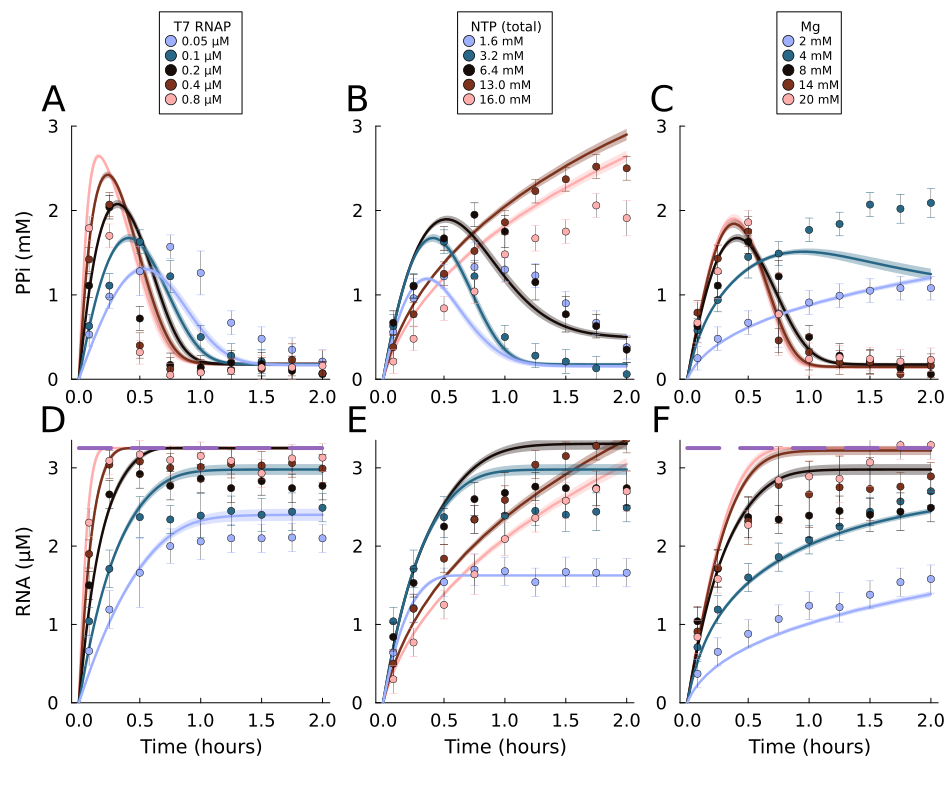

In [710]:
plt = revision1plot1(fittingmodel,modeldata, fittedparams, covariancemat, true,true)
savefig(plt,"figures/figure2.pdf")
plt

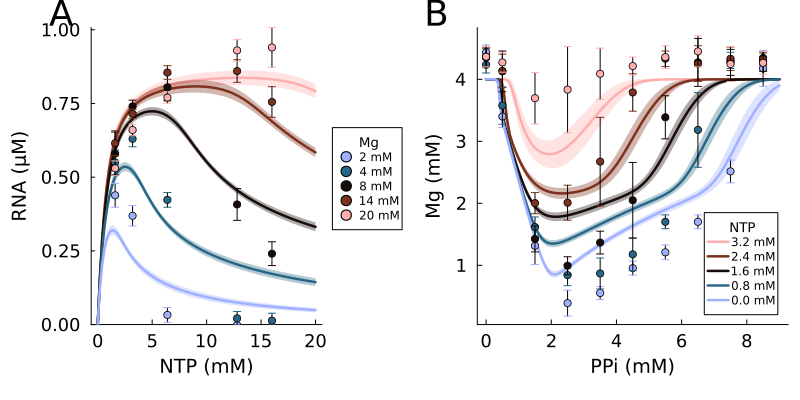

In [711]:
plt = revision1plot2(fittingmodel,modeldata, fittedparams, covariancemat, true,true)
savefig(plt,"figures/figure3.pdf")
plt

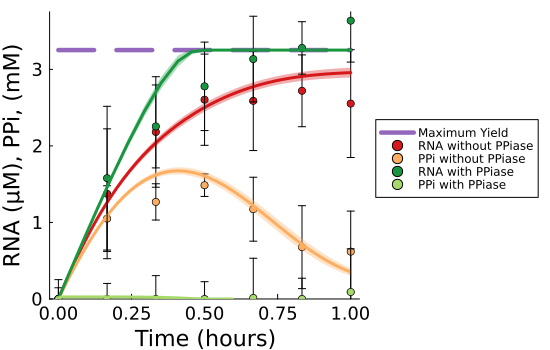

In [712]:
plt= plotakamaPPiase(PPiasedata, fittedparams, covariancemat,fittingmodel)
savefig(plt,"figures/figure4.pdf")
plt

<b>Misc Validation Data<b>

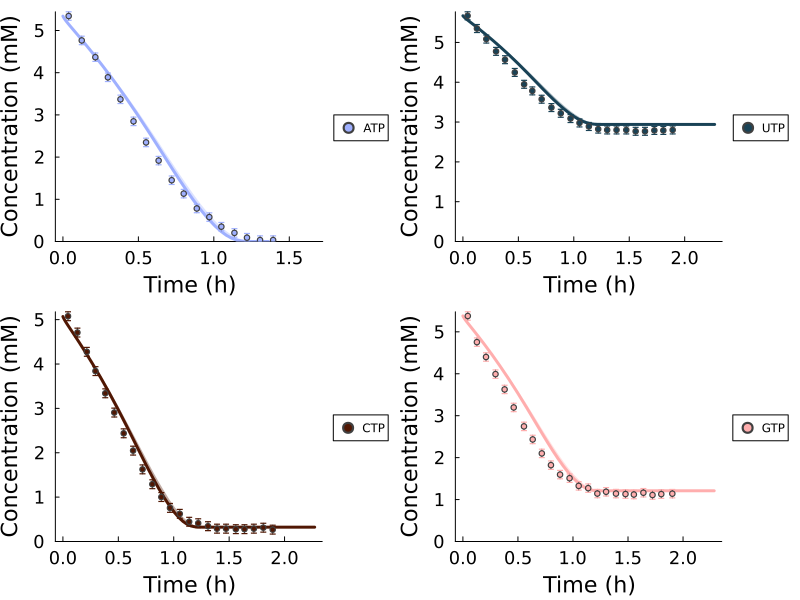

In [713]:
pfizerplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/pfizerNTP.csv",range = 1:4,dataerrorbars = true, maximumyield = false, plotsize = (800,600),labels = ["ATP","UTP","CTP","GTP",])

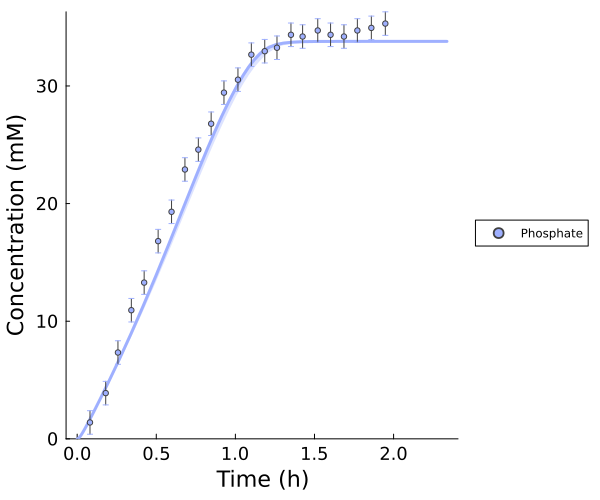

In [714]:
pfizerplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/pfizerNTP.csv",range = 5:5,dataerrorbars = true, maximumyield = false, plotsize = (600,500),labels = ["Phosphate","RNA"])

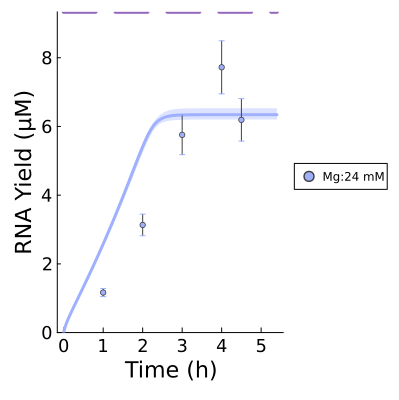

In [715]:
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/arrantaCOVIDFitting.csv",dataerrorbars = true)

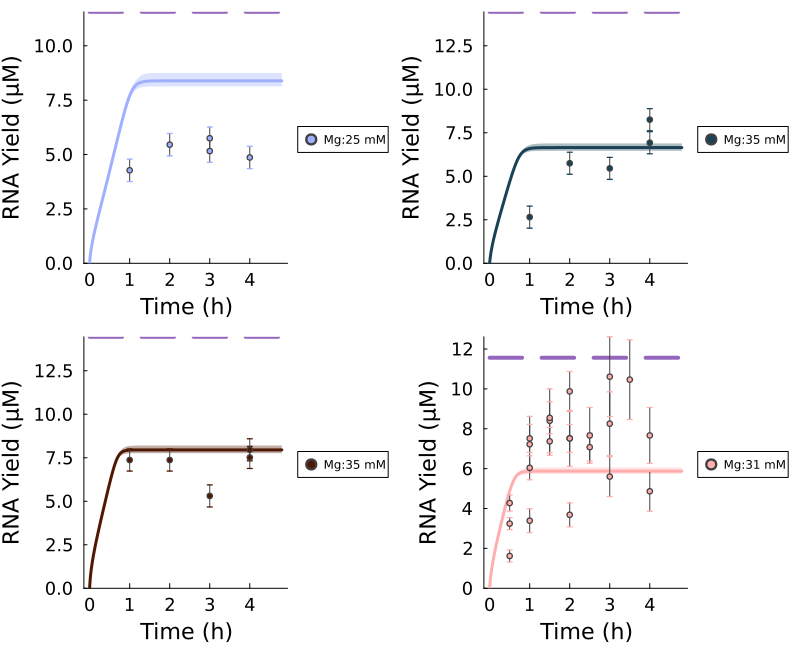

In [725]:
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/arrantaFluc.csv",range = [13,20,21,27],plotsize = (800,650),dataerrorbars = true)

<b>GFP Kinetics<b>

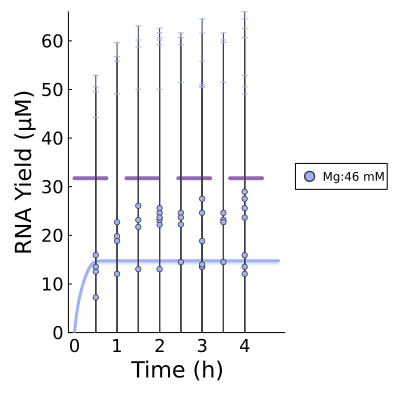

In [726]:
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/arrantaEGFP.csv",range = [26],plotsize = (400,400),dataerrorbars = true)

<b>Rosa Data<b>

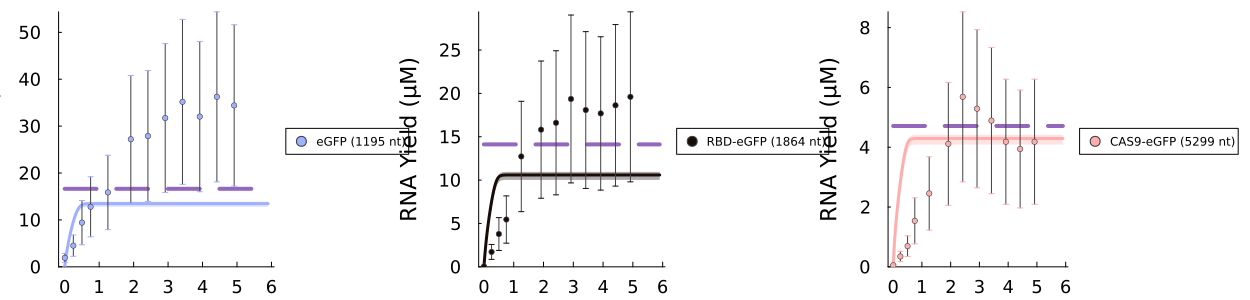

In [718]:
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/rosadata.csv",range = [1,2,3],plotsize = (1250,300),labels = ["eGFP (1195 nt)", "RBD-eGFP (1864 nt)", "CAS9-eGFP (5299 nt)"],dataerrorbars = true, nmc = 1000)

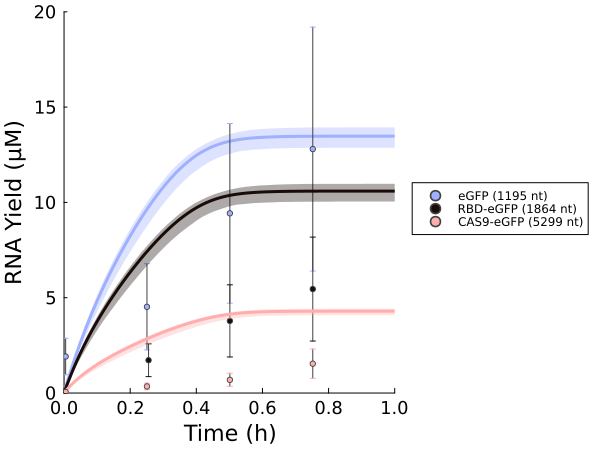

In [719]:
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/rosadata.csv",range = [1,2,3],plotsize = (600,450),labels = ["eGFP (1195 nt)", "RBD-eGFP (1864 nt)", "CAS9-eGFP (5299 nt)"],dataerrorbars = true, multiplot = false,maximumyield = false)
plot!(xlims = (0,1),ylims = (0,20))
savefig(plt,"figures/figure5.pdf")
plt

<b>Pregjlic Data<b>

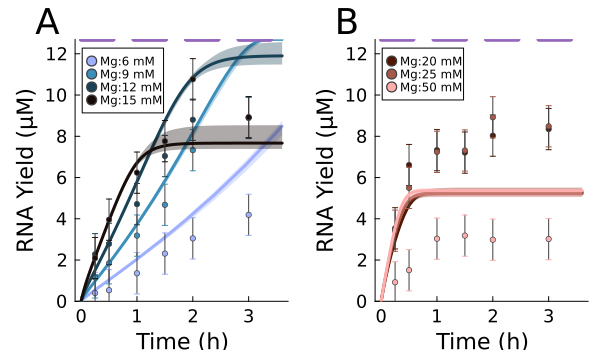

In [720]:
fontsize = 24
pregplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/pregljcdata.csv",range = [1,2,3,4],plotsize = (600,350),multiplot = false,plotsplit = (3,0),dataerrorbars = true)
annotate!(sp=1,[(relativex(-0.13; sp=1), relativey(1.07; sp=1), text("A",fontsize))])
plot!(leftmargin = 5mm,topmargin = 8mm,legend = :topleft)

fontsize = 24
pregplot2 = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/pregljcdata.csv",range = [5,6,7],plotsize = (600,350),multiplot = false,plotsplit = (4,4),dataerrorbars = true)
annotate!(sp=1,[(relativex(-0.13; sp=1), relativey(1.07; sp=1), text("B",fontsize))])
plot!(leftmargin = 5mm,topmargin = 8mm,legend = :topleft)

pregplotmain = plot(pregplot,pregplot2)

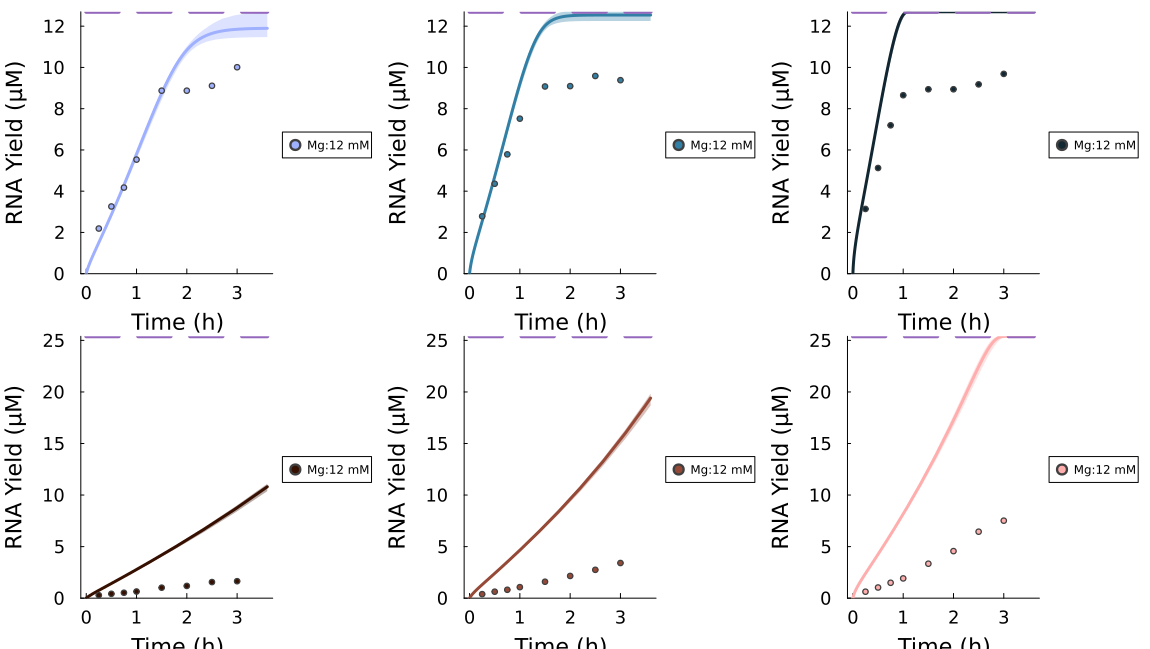

In [721]:
fontsize = 24
pregplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/pregljcdata.csv",range = [8,9,10,11,12,13],plotsize = (1150,650))
plot!(leftmargin = 5mm)

<b>Samnuan<b>

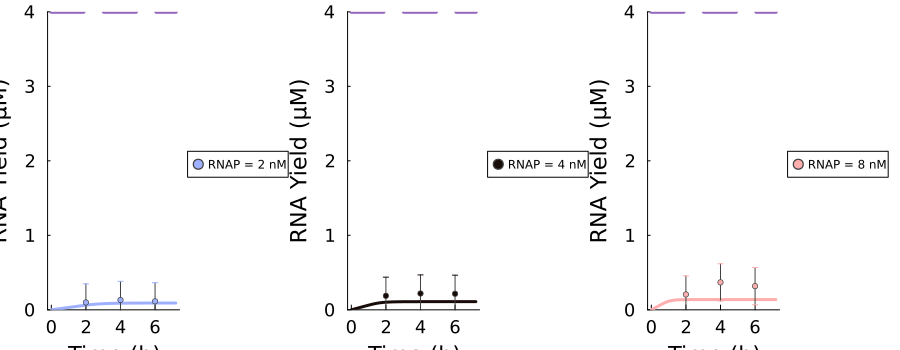

In [722]:
fontsize = 24
pregplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/samnuanrefactoreddata.csv",range = [1,2,3],plotsize = (900,350),labels = ["RNAP = 2 nM","RNAP = 4 nM","RNAP = 8 nM"],dataerrorbars = true)

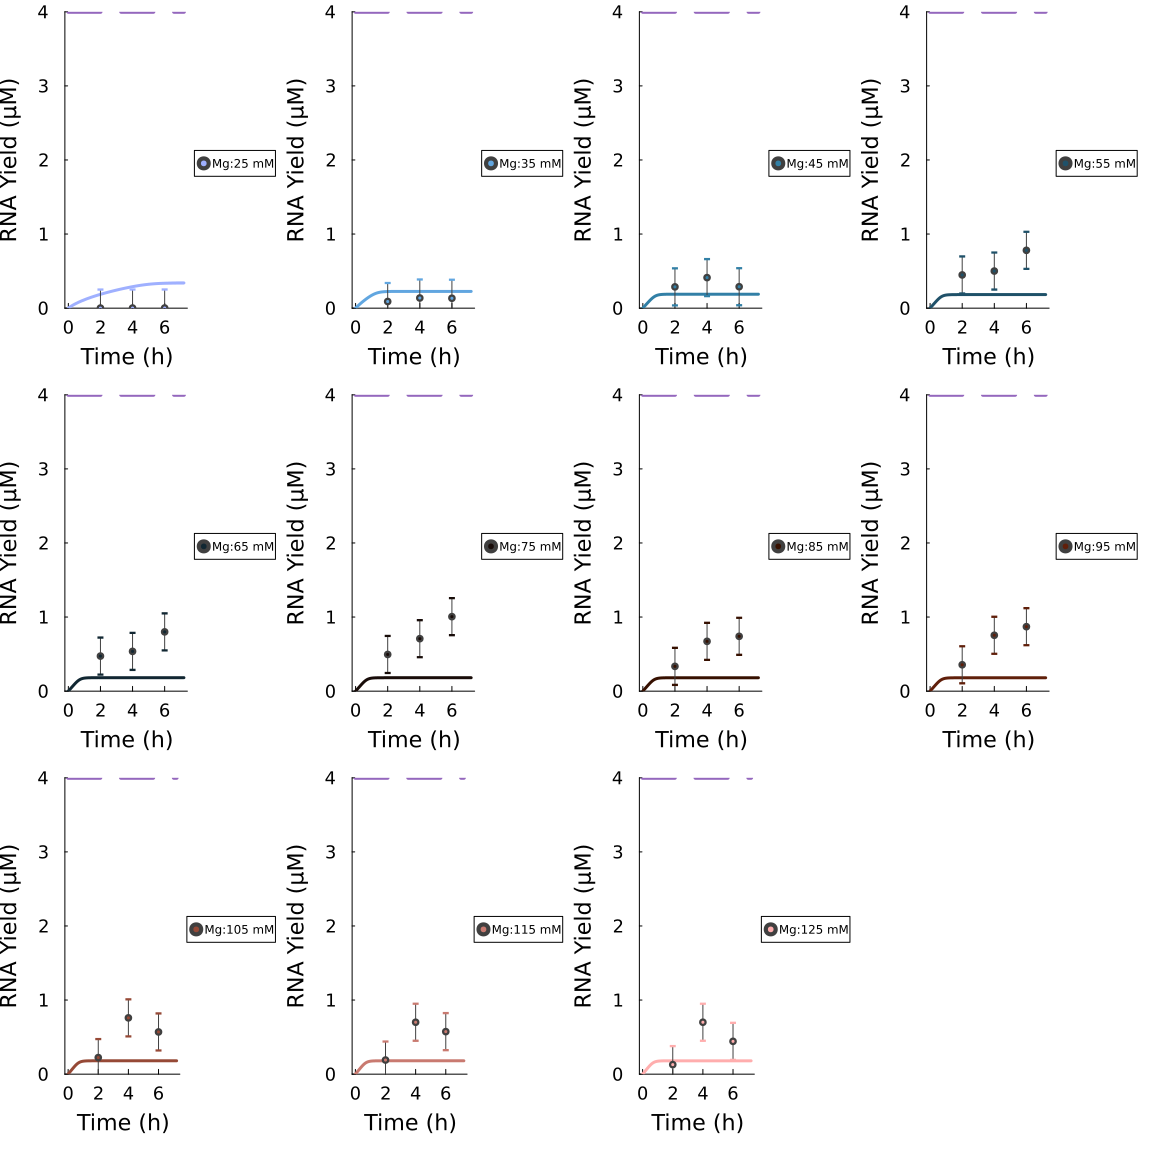

In [727]:
fontsize = 24
pregplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/samnuanrefactoreddata.csv",range = 5:15,plotsize = (1150,1150),dataerrorbars = true)

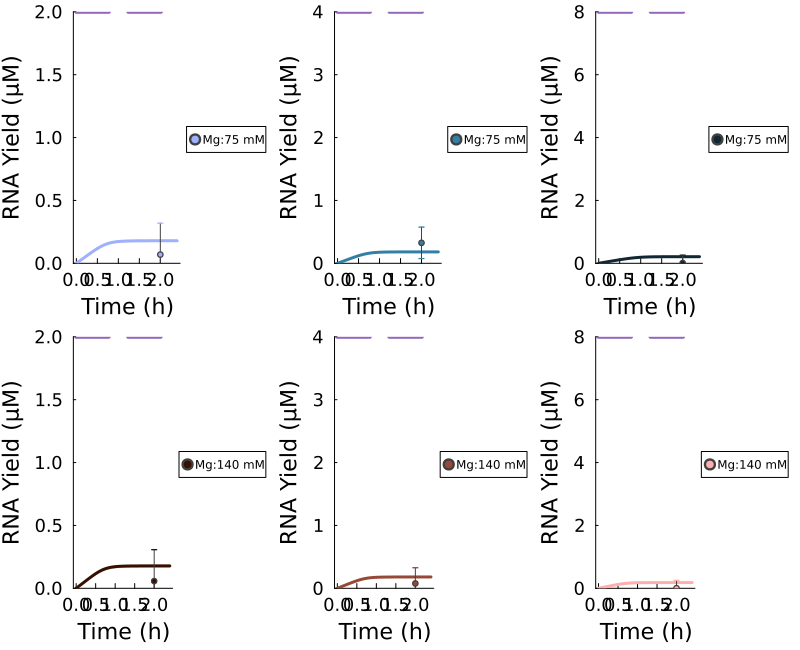

In [728]:
fontsize = 24
pregplot = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,"data/samnuanrefactoreddata.csv",range = 16:21,plotsize = (800,650),dataerrorbars = true)